# Append Features

Hello, so, I need to append feature but not this way because aside from it not working, I need to append with data from memory, not file. CSV data doesn't include shapes so I don't see how it will work. So, we'll be using the normal feature edit.

We'll use this time-enabled feature layer and try to copy the contents to the next day with all numerical fields +10. Id='7a84aef70d1d401f82abfb8324066d54'

In [1]:
jatim_id = '7a84aef70d1d401f82abfb8324066d54'

Let's init first just like always

In [2]:
import os
from dotenv import load_dotenv # add this line

load_dotenv() # add this line

arcgis_user = os.getenv("ARCGIS_USER")
arcgis_pass = os.getenv("ARCGIS_PASS")
arcgis_portal = os.getenv("ARCGIS_PORTAL")

In [3]:
from arcgis.gis import GIS
gis = GIS(arcgis_portal, arcgis_user, arcgis_pass)
gis

GIS @ https://pcovidjatim.maps.arcgis.com version:8.2

## Check the Layer

Now let's check the feature layer

<Item title:"Peta Sebaran Covid19 Jawa Timur (Coba Coba)" type:Feature Layer Collection owner:prediksicovidjatim>
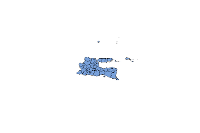

In [4]:
jatim = gis.content.get(jatim_id)
jatim

In [5]:
jatim.layers

[<FeatureLayer url:"https://services2.arcgis.com/gxevpFKXaRT0UMCs/arcgis/rest/services/jatim2_test/FeatureServer/0">]

Make sure we have sufficient capabilities.

In [6]:
jatim_layer = jatim.layers[0]
jatim_layer.properties.capabilities

'Create,Delete,Query,Update,Editing'

Let's check the fields

In [7]:
[f['name'] for f in jatim_layer.properties.fields]

['FID',
 'ID',
 'Kabupaten_',
 'Provinsi',
 'ODP',
 'PDP',
 'OTG',
 'Positif',
 'Sembuh',
 'Meninggal',
 'Shape__Area',
 'Shape__Length',
 'Tanggal']

Now let's see what we have here.

In [8]:
jatim_fset = jatim_layer.query()
jatim_fset.sdf

,FID,ID,Kabupaten_,Provinsi,ODP,PDP,OTG,Positif,Sembuh,Meninggal,Shape__Area,Shape__Length,Tanggal,SHAPE
0,1,1,BANGKALAN,Jawa Timur,1058,78,1132,172,50,26,1.335694e+09,181458.097516,2020-06-26 08:00:00,"{""rings"": [[[12591669.5395945, -789994.2297997..."
1,2,2,BANYUWANGI,Jawa Timur,899,54,509,26,7,1,3.643262e+09,429983.627406,2020-06-26 08:00:00,"{""rings"": [[[12737080.6244433, -885720.3503675..."
2,3,3,BLITAR,Jawa Timur,993,64,380,22,9,5,1.782871e+09,261216.926244,2020-06-26 08:00:00,"{""rings"": [[[12506699.594911, -932213.66706938..."
3,4,4,BOJONEGORO,Jawa Timur,282,29,357,116,25,13,2.398399e+09,292768.403958,2020-06-26 08:00:00,"{""rings"": [[[12477917.7179274, -810460.9532501..."
4,5,5,BONDOWOSO,Jawa Timur,1171,11,279,23,17,1,1.592650e+09,215099.794452,2020-06-26 08:00:00,"{""rings"": [[[12697455.8950979, -907009.4524894..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,73,34,SITUBONDO,Jawa Timur,491,77,716,107,28,19,1.659800e+09,321261.891828,2020-06-27 08:00:00,"{""rings"": [[[12649229.1747406, -888209.6202223..."
72,74,35,SUMENEP,Jawa Timur,377,24,74,62,20,12,2.171832e+09,999117.471812,2020-06-27 08:00:00,"{""rings"": [[[12645070.167245, -787333.85614714..."
73,75,36,TRENGGALEK,Jawa Timur,927,58,284,32,25,10,1.328201e+09,301206.872650,2020-06-27 08:00:00,"{""rings"": [[[12442145.9787975, -926087.2150686..."
74,76,37,TUBAN,Jawa Timur,664,106,956,98,45,17,2.019437e+09,240044.999022,2020-06-27 08:00:00,"{""rings"": [[[12490542.5726978, -777177.9678322..."


## Querying the Layer

Now let's fetch all the data from 26th. Also an example to query dates.

In [9]:
jatim_26 = jatim_layer.query(where='Tanggal= DATE \'2020-06-26 08:00:00\'')
jatim_26.sdf

,FID,ID,Kabupaten_,Provinsi,ODP,PDP,OTG,Positif,Sembuh,Meninggal,Shape__Area,Shape__Length,Tanggal,SHAPE
0,1,1,BANGKALAN,Jawa Timur,1058,78,1132,172,50,26,1.335694e+09,181458.097516,2020-06-26 08:00:00,"{""rings"": [[[12591669.5395945, -789994.2297997..."
1,2,2,BANYUWANGI,Jawa Timur,899,54,509,26,7,1,3.643262e+09,429983.627406,2020-06-26 08:00:00,"{""rings"": [[[12737080.6244433, -885720.3503675..."
2,3,3,BLITAR,Jawa Timur,993,64,380,22,9,5,1.782871e+09,261216.926244,2020-06-26 08:00:00,"{""rings"": [[[12506699.594911, -932213.66706938..."
3,4,4,BOJONEGORO,Jawa Timur,282,29,357,116,25,13,2.398399e+09,292768.403958,2020-06-26 08:00:00,"{""rings"": [[[12477917.7179274, -810460.9532501..."
4,5,5,BONDOWOSO,Jawa Timur,1171,11,279,23,17,1,1.592650e+09,215099.794452,2020-06-26 08:00:00,"{""rings"": [[[12697455.8950979, -907009.4524894..."
5,6,6,GRESIK,Jawa Timur,1320,495,300,562,77,58,1.246202e+09,335981.197273,2020-06-26 08:00:00,"{""rings"": [[[12516708.6642867, -767048.2590046..."
6,7,7,JEMBER,Jawa Timur,1309,213,1842,104,39,4,3.445774e+09,396761.986893,2020-06-26 08:00:00,"{""rings"": [[[12612632.0015863, -927845.5466376..."
7,8,8,JOMBANG,Jawa Timur,695,80,1170,215,18,18,1.122795e+09,190119.682156,2020-06-26 08:00:00,"{""rings"": [[[12518356.30407, -868319.191789681..."
8,9,9,KEDIRI,Jawa Timur,1277,262,2000,192,39,10,1.571780e+09,262870.861173,2020-06-26 08:00:00,"{""rings"": [[[12464442.7162059, -894629.8309977..."
9,10,10,Kota BATU,Jawa Timur,324,109,394,55,21,4,1.958145e+08,75233.067869,2020-06-26 08:00:00,"{""rings"": [[[12521095.2088214, -867166.1302547..."


Now on 27

In [10]:
jatim_27 = jatim_layer.query(where='Tanggal= DATE \'2020-06-27 08:00:00\'')
jatim_27.sdf

,FID,ID,Kabupaten_,Provinsi,ODP,PDP,OTG,Positif,Sembuh,Meninggal,Shape__Area,Shape__Length,Tanggal,SHAPE
0,40,1,BANGKALAN,Jawa Timur,1078,98,1152,192,70,36,1.335694e+09,181458.097516,2020-06-27 08:00:00,"{""rings"": [[[12591669.5395945, -789994.2297997..."
1,41,2,BANYUWANGI,Jawa Timur,909,64,519,36,17,11,3.643262e+09,429983.627406,2020-06-27 08:00:00,"{""rings"": [[[12737080.6244433, -885720.3503675..."
2,42,3,BLITAR,Jawa Timur,1003,74,390,32,19,15,1.782871e+09,261216.926244,2020-06-27 08:00:00,"{""rings"": [[[12506699.594911, -932213.66706938..."
3,43,4,BOJONEGORO,Jawa Timur,292,39,367,126,35,23,2.398399e+09,292768.403958,2020-06-27 08:00:00,"{""rings"": [[[12477917.7179274, -810460.9532501..."
4,44,5,BONDOWOSO,Jawa Timur,1181,21,289,33,27,11,1.592650e+09,215099.794452,2020-06-27 08:00:00,"{""rings"": [[[12697455.8950979, -907009.4524894..."
5,45,6,GRESIK,Jawa Timur,1330,505,310,572,87,68,1.246202e+09,335981.197272,2020-06-27 08:00:00,"{""rings"": [[[12516708.6642867, -767048.2590046..."
6,46,7,JEMBER,Jawa Timur,1319,223,1852,114,49,14,3.445774e+09,396761.986893,2020-06-27 08:00:00,"{""rings"": [[[12612632.0015863, -927845.5466376..."
7,47,8,JOMBANG,Jawa Timur,705,90,1180,225,28,28,1.122795e+09,190119.682157,2020-06-27 08:00:00,"{""rings"": [[[12518356.30407, -868319.191789681..."
8,48,9,KEDIRI,Jawa Timur,1287,272,2010,202,49,20,1.571780e+09,262870.861173,2020-06-27 08:00:00,"{""rings"": [[[12464442.7162059, -894629.8309977..."
9,49,10,Kota BATU,Jawa Timur,334,119,404,65,31,14,1.958145e+08,75233.067870,2020-06-27 08:00:00,"{""rings"": [[[12521095.2088214, -867166.1302547..."


## Deleting Features

We'll delete all features on 27 if exists. get_value on 'objectid' or 'OID' returns nothing so I guess the guide and API reference are outdated.

In [11]:
jatim_26.features[1].get_value('objectid')

In [12]:
jatim_26.features[1].get_value('objectId')

In [13]:
jatim_26.features[1].get_value('OID')

In [14]:
jatim_26.features[1].get_value('FID')

2

In [15]:
if len(jatim_27.features) > 0:
    jatim_layer.delete_features(where='Tanggal= DATE \'2020-06-27 08:00:00\'')

Exception: 
Unable to delete features.
(Error Code: 400)

## Manipulating the Features

Now let's get going. Let's check the type of the date first.

In [ ]:
tanggal = jatim_26.features[1].attributes['Tanggal']
tanggal

In [ ]:
type(tanggal)

Well, damn. It's not string but int. Is it ticks? ms?

In [ ]:
from datetime import datetime
tanggal_dt = datetime.utcfromtimestamp(tanggal / 1e3)
tanggal_dt

Now to return it

In [ ]:
tanggal_2 = int(tanggal_dt.timestamp() * 1e3)
tanggal_2 == tanggal

In [ ]:
tanggal_2

Eh, wrong int. Why?

In [ ]:
from datetime import timezone
int(tanggal_dt.replace(tzinfo=timezone.utc).timestamp() * 1e3)

Classic timezone issue. My bad.

Let's make this a function.

In [ ]:
def ms_to_datetime(x):
    return datetime.utcfromtimestamp(x / 1e3).replace(tzinfo=timezone.utc)
def datetime_to_ms(x):
    return int(x.timestamp() * 1e3)

In [ ]:
datetime_to_ms(tanggal_dt)

In [ ]:
tanggal == datetime_to_ms(ms_to_datetime(tanggal))

But wait! Can't I just add a whole day worth of milliseconds?

In [ ]:
ms_per_day = 86400 * 1000
tanggal_3 = tanggal + ms_per_day
ms_to_datetime(tanggal_3)

Nice.

In [ ]:
for f in jatim_26.features:
    f.attributes["ODP"] += 10
    f.attributes["PDP"] += 10
    f.attributes["OTG"] += 10
    f.attributes["Positif"] += 10
    f.attributes["Sembuh"] += 10
    f.attributes["Meninggal"] += 10
    f.attributes["Tanggal"] += ms_per_day

## Appending the Manipulated Features

In [ ]:
update_result = jatim_layer.edit_features(adds=jatim_26.features)
update_result

In [ ]:
jatim_fset = jatim_layer.query()
len(jatim_fset.features)

In [ ]:
jatim_27 = jatim_layer.query(where='Tanggal= DATE \'2020-06-27 08:00:00\'')
jatim_27.sdf

This concludes appending feature.

Extra

In [ ]:
type(jatim_26.features[0])

In [ ]:
from arcgis.features.feature import Feature
new_feature = Feature(jatim_26.features[0].geometry, jatim_26.features[0].attributes)

In [ ]:
new_feature.geometry